### Figure 5 CNV nanopore unblocked data/bionano comparison


In [9]:
import gzip
from string import ascii_uppercase

from readpaf import parse_paf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from tqdm.notebook import tqdm

In [10]:
from pathlib import Path
Path().cwd()

PosixPath('/mnt/scratch_workspace/read_until_analysis/SwordFish_Analysis/paper_figures/figure_5')

In [11]:
def load_barcoded_data(path, read_kws=None):
    """Load a PAF file and the first tag (which we hope is `tp')
    
    Actions performed:
     - Filter for primary mappings (`tp:A:P`)
     - Keep the highest quality mapping read
     - Create the strand dependant `map_start' column
    """
    read_kws = {} if read_kws is None else read_kws
    df = pd.read_csv(path, **read_kws)
    df = df[df["tp"].eq("tp:A:P")]
    df = df.drop_duplicates(subset="query_name", keep="first")
    df["map_start"] = np.where(df['strand'].eq("+"), df["target_start"], df['target_end'])
    return df

In [12]:
def paf_to_targets_dict(paf_df, remove=None, sort=True):
    """Take a PAF DataFrame with columns `target_name' 
    and `target_length' and return an ordered dict of 
    targets and their lengths.
    """
    chrom_order = [f"chr{x}" for x in "1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 X Y".split()]
    remove = [] if remove is None else remove
    remove = [remove] if isinstance(remove, str) else remove
    chrs = dict(paf_df[["target_name", "target_length"]].drop_duplicates(keep="first").itertuples(index=False))
    for chrom in remove:
        _ = chrs.pop(chrom, 0)
    if sort:
        chrs = dict(sorted(chrs.items(), key=lambda t: chrom_order.index(t[0])))
    return chrs

In [13]:
cols = [
    "query_name",
    "query_length",
    "query_start",
    "query_end",
    "strand",
    "target_name",
    "target_length",
    "target_start",
    "target_end",
    "residue_matches",
    "alignment_block_length",
    "mapping_quality",
    "tp",
]
kws = {"sep": "\t", "usecols": range(13), "names": cols}
bc_dfs = {
    f"barcode{f:0>2}.paf": load_barcoded_data(f"paf_files/barcode{f:0>2}.paf", kws) 
    for f in [1, 2, 3]
}

In [14]:
df = bc_dfs["barcode03.paf"]

In [15]:
bin_size = 50_000
df["bin"] = df["map_start"].floordiv(bin_size)
plot_df = df.groupby(["target_name", "bin"], as_index=False).size()
plot_df["ploidy"] = plot_df["size"] / plot_df["size"].median() * 2

In [16]:
print("target_name   bins  missing_bins")
for name, group in plot_df.groupby("target_name"):
    print(f"{name:>11}  {len(group):>5,}  {(group['bin'].diff() - 1).fillna(0).sum():>12}")
    # break

target_name   bins  missing_bins
       chr1  4,619         360.0
      chr10  2,672           4.0
      chr11  2,695           6.0
      chr12  2,666           0.0
      chr13  1,966           2.0
      chr14  1,815           3.0
      chr15  1,700           0.0
      chr16  1,644         161.0
      chr17  1,664           0.0
      chr18  1,605           1.0
      chr19  1,172           0.0
       chr2  4,818          26.0
      chr20  1,286           0.0
      chr21    829           5.0
      chr22    805           2.0
       chr3  3,965           0.0
       chr4  3,802           3.0
       chr5  3,630           0.0
       chr6  3,406           8.0
       chr7  3,187           0.0
       chr8  2,901           0.0
       chr9  2,457         310.0
       chrM      1           0.0
       chrX  3,110          11.0
       chrY    541         604.0


### Rory was here and he said let there be Gridspecs, and it was good

### Etc.

In [17]:
def add_panel_label(letter: str, text_font_dict: dict, axy, x_offset : float = -0.03, y_offset: float = 1.07) -> None:
    """
    Add the panel label (ABC) to the first axes in the Subplots
    """
    axy.text(
        x_offset, y_offset, letter,
        horizontalalignment='center',
        verticalalignment='center',
        fontdict=text_font_dict,
        transform=axy.transAxes
    )

  0%|          | 0/3 [00:00<?, ?it/s]

/data/.miniconda3/envs/jupyter/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/data/.miniconda3/envs/jupyter/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/data/.miniconda3/envs/jupyter/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/data/.miniconda3/envs/jupyter/lib/python3.9/site-packages/pandas/plotting/_mat

/data/.miniconda3/envs/jupyter/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/data/.miniconda3/envs/jupyter/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/data/.miniconda3/envs/jupyter/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:395: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
/data/.miniconda3/envs/jupyter/lib/python3.9/site-packages/pandas/plotting/_mat

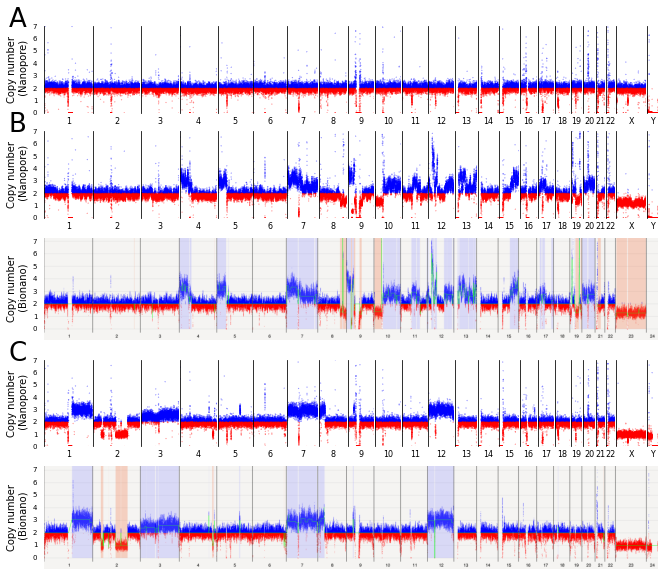

In [25]:
grid_ylab = "Copy number"
grid_ycol = "ploidy"
grid_ylim = (0, 8)
grid_fig_size = (11,10)
xcol = "bin"
grid_file_ext = "png"
plot_kws = {"x": xcol, "y": grid_ycol, "marker": "."}

fig = plt.figure(figsize=grid_fig_size)
# Make the plot
fig.set_facecolor("white")
chrs = paf_to_targets_dict(df, remove="chrM")
# grid spec 5 rows, 1 column, height ratios (1.21) so the png fills the whole axis
gs0 = gridspec.GridSpec(5, 1, figure=fig, height_ratios=[1, 1, 1.21, 1, 1.21])
gs0.tight_layout(fig)
gs_title_font_dict = {"fontsize": 26, "ha": "center"}

# sub gridspecs for the 3 panels we are drawing from nanopore paf data
sub_gs_kwargs = {"ncols": len(chrs), "nrows": 1, "width_ratios": chrs.values(), "wspace": 0.025}

gs01 = gs0[0].subgridspec(**sub_gs_kwargs)
gs02 = gs0[1].subgridspec(**sub_gs_kwargs)
gs04 = gs0[3].subgridspec(**sub_gs_kwargs)

# create all 5 axes for our panels, 3 (1st, 2nd, 4th) are generators yielding axes for each vontig of nanopore data, 2 are single axes to put the PNG on
axs_1st = (fig.add_subplot(gs01[i]) for i in range(len(chrs)))
axs_2nd = (fig.add_subplot(gs02[i]) for i in range(len(chrs)))
axs_3rd = fig.add_subplot(gs0[2])
axs_4th = (fig.add_subplot(gs04[i]) for i in range(len(chrs)))
axs_5th = fig.add_subplot(gs0[4])

# progress bar
prog = tqdm(bc_dfs.items(), dynamic_ncols=True)
nanopore_axes = (axs_1st, axs_2nd, axs_4th)
bionano_axes = (axs_3rd, axs_5th)
# PNGs from bionano browser
bionano_images = ("NB4_cropped_cnv.png", "22Rv1_cropped_cnv.png")
panel_lables = iter(("A", "B", "C"))

for j, (file, df) in enumerate(prog):
    chrs = paf_to_targets_dict(df, remove="chrM")


# enumerate paf dfs
for j, (file, df) in enumerate(prog):
    file = ".".join(file.split('.')[:-1])
    # Create bins, aggregate data, normalise to expected copy
    df["bin"] = df["map_start"].floordiv(bin_size)
    plot_df = df.groupby(["target_name", "bin"], as_index=False).size()
    plot_df["ploidy"] = plot_df["size"] / plot_df["size"].median() * 2

    # Get targets for this PAF file
    chrs = paf_to_targets_dict(df, remove="chrM")

    for i, (ax, target) in enumerate(zip(nanopore_axes[j], chrs.keys())):
        target_length = chrs.get(target)
        assert target_length is not None, "This shouldn't happen"

        # Subset data
        tmpdf = plot_df[plot_df["target_name"].eq(target) & plot_df[grid_ycol].between(*grid_ylim)]

        # Fill missing bins
        expected_min = 0
        expected_max = (target_length // bin_size) + 1
        # Create new index with all expected bins, apply that. 
        #   See: https://stackoverflow.com/a/25916109
        new_index = pd.Index(np.arange(expected_min, expected_max, 1), name=xcol)
        tmpdf = tmpdf.set_index(xcol).reindex(new_index).reset_index()
        # These maybe unnecessary 
        tmpdf["target_name"] = tmpdf["target_name"].fillna(target)
        tmpdf = tmpdf.fillna(0)

        # Generate colours array
        colors = (tmpdf[grid_ycol].gt(2)).map({True: "blue", False: "red"}).to_numpy()
        # Plot
        tmpdf.plot.scatter(c=colors, ax=ax, **plot_kws, s=0.1)
        ax.set_xmargin(0.01)
        
        # Despine
        for side in ["top", "bottom", "right"]:
            ax.spines[side].set_visible(False)
        # if not first col remove y axis labels
        if not ax.get_subplotspec().is_first_col():
            ax.yaxis.set_visible(False)
        else:
            ax.set_ylabel(f"{grid_ylab}\n (Nanopore)", fontsize="medium")
            add_panel_label(next(panel_lables), gs_title_font_dict, ax, x_offset=-0.55)
        # fixed y lim for each contig axes
        ax.set_ylim(0,7)        
        # Remove x/y ticks
        ax.tick_params(bottom=False, left=False, labelbottom=False)
        target = target.lstrip("chr")
        ax.set_yticks(np.arange(min(ax.get_ylim()), max(ax.get_ylim())+1/7, (sum(ax.get_ylim())) / 7))
        # force 0-7 on axes (mpl scaled down at this in steps of 2, 0-6 )
        ax.set_yticklabels(range(0,8,1), fontsize=7)
        ax.xaxis.set_label_text(target, fontdict={"fontsize": 8})

# now append bionano pngs
for (ax, im) in zip(bionano_axes, bionano_images):
    img = plt.imread(im)
    ax.imshow(img)
    # fully despine
    for side in ["top", "bottom", "right", "left"]:
        ax.spines[side].set_visible(False)
    # remove x/y ticks
    ax.tick_params(bottom=False, left=False, labelbottom=False)
    ax.set_ylabel(f"{grid_ylab}\n (Bionano)", fontsize="medium")
    # unintutively and wierdly going top down, set ticks so they match up with the png lines, done in something resembling pixels, eyeballometrically
    ax.set_yticks(np.arange(min(ax.get_ylim())+11, (max(ax.get_ylim())-30), (sum(ax.get_ylim())-45) / 7))
    ax.set_yticklabels(range(7,-1,-1), fontsize=7)
    

fig.savefig(
    f"copy-number-bio-nano-grid-spec-bins.{grid_file_ext}", 
    dpi=300, facecolor="w", 
    transparent=False, 
    bbox_inches="tight",
)